<a href="https://colab.research.google.com/github/gustahps-0712/MachineLearningProjects/blob/main/Banks_Data_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Business Problem

We have a set of banking data with characteristics such as the client's age, experience, income, education and whether or not he has a credit card.

The bank wants to build a predictive machine with machine learning that will help them identify the **potential customers most likely to take out a personal loan.**

**Installing PyCaret on your machine**

In [1]:
!pip3 install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00


**Installing the Model Interpretability Library**
> Indented block



In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.5 MB/s eta 0:00:00


In [3]:
# importing pandas to read the CSV file
import pandas as pd
# read the data
data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_train_data.csv')
# view the top rows of the data
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [4]:
data_classification.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [5]:
# Checking the Pycaret Version
from pycaret.utils import version
version()

'3.0.2'

In [6]:
from pycaret import classification

In [7]:
classification_setup = classification.setup(data= data_classification, target='Personal Loan')

,Description,Value
0,Session id,2614
1,Target,Personal Loan
2,Target type,Binary
3,Original data shape,"(4000, 14)"
4,Transformed data shape,"(4000, 14)"
5,Transformed train set shape,"(2800, 14)"
6,Transformed test set shape,"(1200, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


**Training a model**

Training a model in PyCaret is quite simple. You just need to use the **create_model** function which takes only one parameter - the model abbreviation as a string.

Here, we will first train a decision tree model to which we have to pass **“ dt ”** and it will return a table with **k-fold cross validation** scores of common evaluation metrics used for decision models. classification.

Here's a quick reminder of the **assessment metrics** used for supervised learning:

**Rating**: Accuracy, AUC, Recall, Accuracy, F1, Kappa
**Regression**: MAE, MSE, RMSE, R2, RMSLE, MAPE

In [8]:
# Creating the Model (Predictive Machine)
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.8940,0.8077,0.8077,0.8077,0.7880,0.7880
1,0.9786,0.9551,0.9259,0.8621,0.8929,0.8810,0.8817
2,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180,0.9180
3,0.9571,0.9101,0.8519,0.7419,0.7931,0.7693,0.7716
4,0.9821,0.9570,0.9259,0.8929,0.9091,0.8992,0.8994
5,0.9750,0.9035,0.8148,0.9167,0.8627,0.8490,0.8508
6,0.9786,0.9385,0.8889,0.8889,0.8889,0.8770,0.8770
7,0.9857,0.9921,1.0000,0.8710,0.9310,0.9231,0.9258
8,0.9857,0.9425,0.8889,0.9600,0.9231,0.9152,0.9160


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [9]:
# Creating Boosting Clusters
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.8940,0.8077,0.8077,0.8077,0.7880,0.7880
1,0.9821,0.9405,0.8889,0.9231,0.9057,0.8958,0.8960
2,0.9929,0.9630,0.9259,1.0000,0.9615,0.9576,0.9585
3,0.9714,0.9511,0.9259,0.8065,0.8621,0.8462,0.8487
4,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633,0.8648
5,0.9786,0.9385,0.8889,0.8889,0.8889,0.8770,0.8770
6,0.9786,0.9551,0.9259,0.8621,0.8929,0.8810,0.8817
7,0.9893,0.9941,1.0000,0.9000,0.9474,0.9414,0.9430
8,0.9821,0.9405,0.8889,0.9231,0.9057,0.8958,0.8960


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [10]:
# Look at the TREASURE: Comparing several Predictive Machines
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9846,0.9973,0.8917,0.9489,0.9167,0.9083,0.9104,0.9670
xgboost,Extreme Gradient Boosting,0.9846,0.9962,0.8956,0.9435,0.9177,0.9092,0.9103,0.4490
lightgbm,Light Gradient Boosting Machine,0.9846,0.9965,0.8769,0.9608,0.9155,0.9071,0.9091,0.3930
rf,Random Forest Classifier,0.9832,0.9961,0.8360,0.9881,0.9027,0.8937,0.8991,0.8040
dt,Decision Tree Classifier,0.9779,0.9411,0.8956,0.8793,0.8860,0.8738,0.8746,0.0700
et,Extra Trees Classifier,0.9764,0.9900,0.7731,0.9762,0.8613,0.8487,0.8564,0.5270
ada,Ada Boost Classifier,0.9693,0.9807,0.7879,0.8864,0.8305,0.8137,0.8176,0.3490
lda,Linear Discriminant Analysis,0.9450,0.9592,0.6174,0.7693,0.6834,0.6537,0.6594,0.0830
ridge,Ridge Classifier,0.9346,0.0000,0.3422,0.9455,0.5003,0.4736,0.5454,0.0830
qda,Quadratic Discriminant Analysis,0.9282,0.9505,0.6843,0.6274,0.6489,0.6094,0.6134,0.0740


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=2614, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

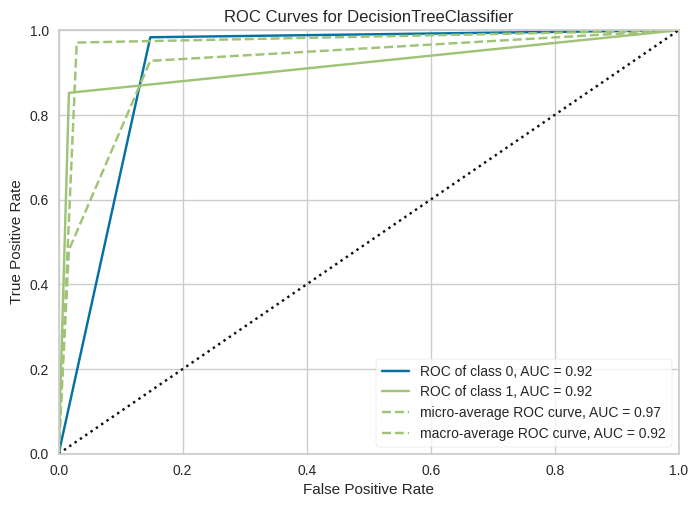

In [11]:
# AUC-ROC chart
classification.plot_model(classification_dt, plot = 'auc')

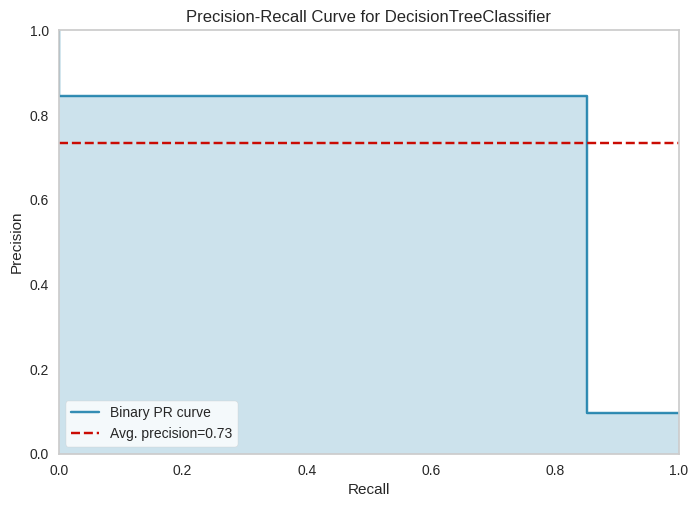

In [12]:
# Precision Recall curve
classification.plot_model(classification_dt, plot = 'pr')

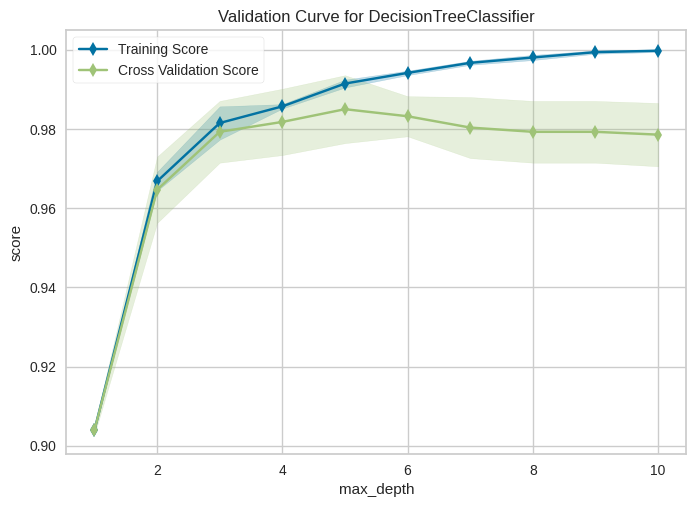

In [13]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

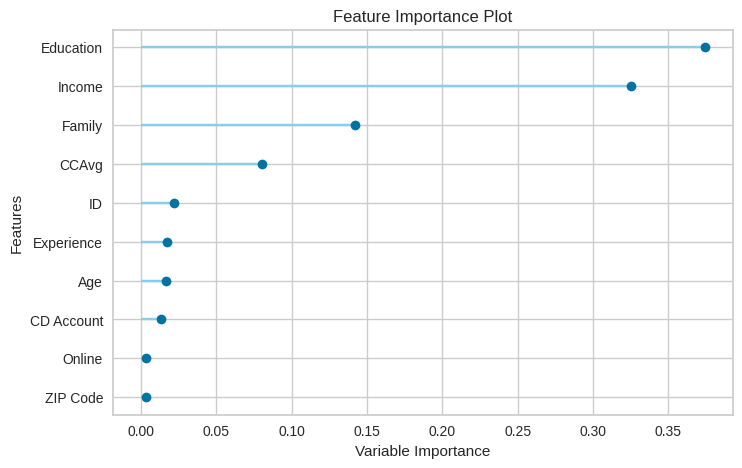

In [14]:
# Importance of Variables
classification.plot_model(classification_dt, plot = 'feature')

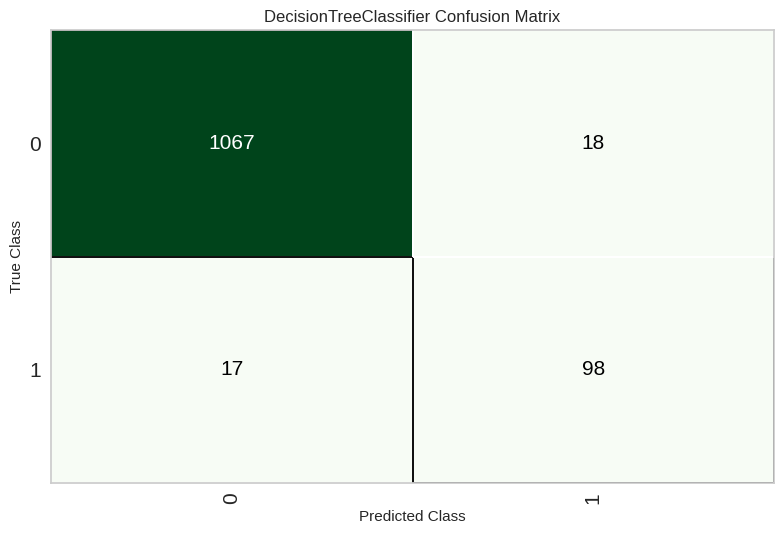

In [15]:
# Confusion Matrix
classification.plot_model(classification_dt, plot = 'confusion_matrix')

In [16]:
# Evaluation of Predictive Machines
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Interpretabilidade dos Modelos (das Máquinas Preditivas)

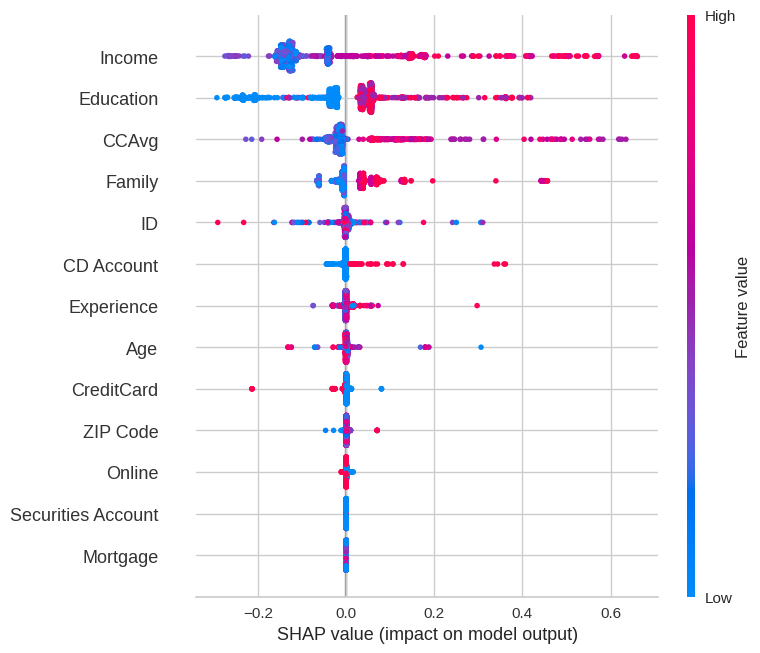

In [17]:
# Using the SHAP Library
classification.interpret_model(classification_dt)

In [18]:
# Test Data
test_data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_test_data.csv')

In [19]:
# Making new predictions
predictions = classification.predict_model(classification_dt, data=test_data_classification)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9730,0.9245,0.8646,0.8557,0.8601,0.8452,0.8452


In [20]:
# Printing the new predictions on the screen
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,prediction_label,prediction_score
0,118,58,33,61,92833,2,2.3,3,193,0,0,1,0,0,0,1.0
1,1817,45,19,91,92373,2,1.7,2,0,1,0,1,0,0,0,1.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,1,0,0,0,1.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,1,0,0,1.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,1.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,1,0,0,0,1.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,1,0,0,0,1.0
998,4960,51,27,55,93014,1,1.6,2,197,1,0,1,0,0,0,1.0


In [21]:
# Saving the Final Predictive Machine
classification.save_model(classification_dt, 'decision_tree_1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ID', 'Age', 'Experience',
                                              'Income', 'ZIP Code', 'Family',
                                              'CCAvg', 'Education', 'Mortgage',
                                              'Securities Account', 'CD Account',
                                              'Online', 'CreditCard'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fa...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
          

In [22]:
# Charging to Use Ultimate Predictive Machine. This is where the Application, once created, will work...
dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Successfully Loaded


Interpretability remains a very important aspect of machine learning and data science as more complex models are put into production. **LIME and [Shapley](https://github.com/slundberg/shap/blob/master/notebooks/api_examples/explainers/Exact.ipynb)** are two such methods that have started to see some industry adoption.